# **Project Name**- EMIPredict AI–Intelligent Financial Risk Assessment Platform
# **Project Type -** Machine Learning + FinTech Web Application (Classification + Regression)

#### This project combines data preprocessing, feature engineering, ML model building, MLflow experiment tracking, and Streamlit-based deployment into a single intelligent EMI (Equated Monthly Instalment) prediction platform.

# **Contribution -** Individual
# **Project Summary -**

#### The **EMIPredict AI** project is a **financial risk assessment system** designed to help banks, credit agencies, and fintech firms evaluate loan applicants more intelligently.It automates the loan eligibility and EMI prediction process using machine learning.

### Key Highlights :

* #### Handles **400,000+** real-world-like records from diverse financial domains.

* Dual-task modeling:

* **Classification:** Predict EMI eligibility (Eligible / High_Risk / Not_Eligible)

* **Regression:** Estimate the maximum safe EMI amount a user can pay.

* Features span across demographics, income, expenses, dependents, and credit history.

* Deployed using Streamlit Cloud, making it accessible and interactive.

### Business Purpose:

#### The platform helps institutions make data-driven loan decisions and prevents defaults through early identification of financial risks. It reduces manual underwriting time, ensures fairness in loan approvals, and scales efficiently for digital lending ecosystems.

# **GitHub Link -** https://github.com/tonujaramesh/EMIPredict-AI-Intelligent-Financial-Risk-Assessment-Platform

# **Problem Statement -**

#### Financial institutions often rely on manual judgment or incomplete analysis to determine a person’s EMI eligibility, which can:

* #### Lead to unaffordable loans, defaults, or overburdened customers.

* #### Waste valuable time during loan processing and risk evaluation.

#### At the same time, individuals lack awareness of how much EMI they can realistically handle.

#### Thus, the problem addressed is:

---

#### “To build an automated, data-driven EMI eligibility and risk assessment platform that predicts whether a customer qualifies for EMI and how much EMI they can safely afford, based on their complete financial profile.”

---

#### This solution merges AI-based decision intelligence with transparent model tracking, allowing users and institutions to make responsible financial decisions.

# ***Let's Begin !***

# **1. Know Your Data**

# Importing Libraries

In [ ]:
!pip install mlflow==2.16.0 xgboost scikit-learn pandas numpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn, xgboost, mlflow
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df = pd.read_csv("emi_prediction_dataset.csv",low_memory=False)
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


# Dataset Rows & Columns count

In [3]:
print("\nShape:", df.shape)
print("\nNumber of Rows:", df.shape[0])
print("\nNumber of Columns:", df.shape[1])


Shape: (404800, 27)

Number of Rows: 404800

Number of Columns: 27


# Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

# Dataset Duplicate Value Count

In [5]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")


Number of Duplicate Rows: 0


# Missing Values/Null Values Count

In [6]:
print("Missing Values in Each Column:\n")
print(df.isnull().sum())

Missing Values in Each Column:

age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary               0
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              2426
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64


# Visualizing the missing values

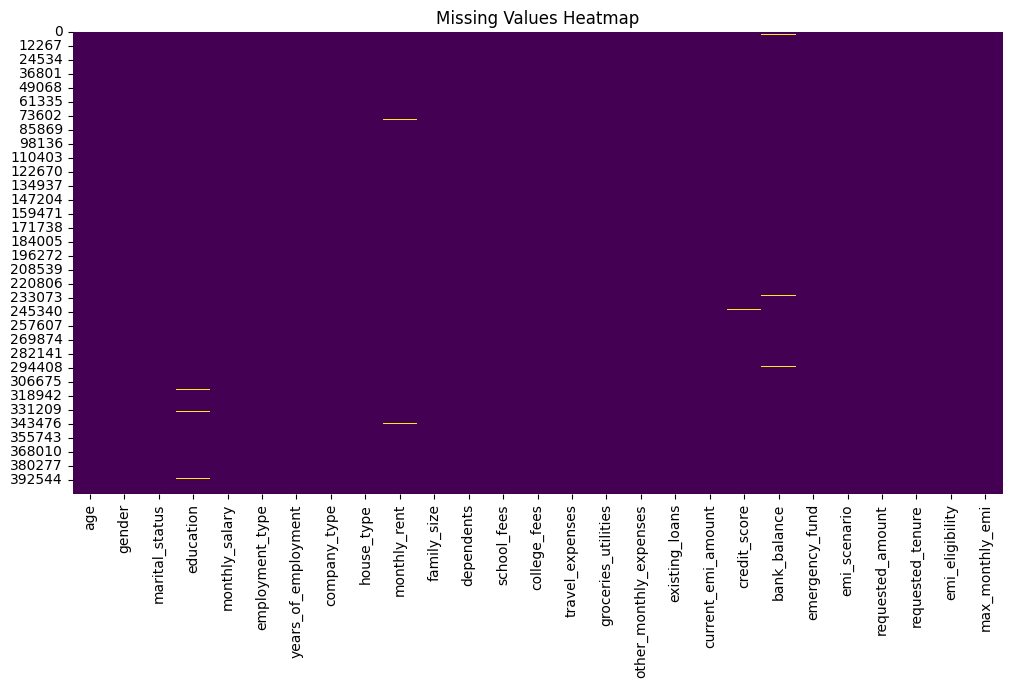

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Handled Missing Values

In [8]:
# ✅ Handling Missing Values
# Categorical Columns → Fill with Mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Numerical Columns → Fill with Median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# ✅ Check again to confirm
df.isnull().sum()


,0
age,0
gender,0
marital_status,0
education,0
monthly_salary,0
employment_type,0
years_of_employment,0
company_type,0
house_type,0
monthly_rent,0


## What did you know about your dataset?

### This dataset contains detailed financial and demographic information of individuals applying for EMI (Equated Monthly Installment). The purpose of this dataset is to help predict:

* #### Whether a person is eligible for EMI or not → Classification Problem

* #### What is the maximum safe EMI amount they can pay per month → Regression Problem

### Key Observations About the Dataset:

* #### 📊 Total Records      - 	**404,800 rows**
* #### 📁 Total Columns	     -   **27 columns**
* #### 🎯 Target Variables       - emi_eligibility (Eligible / High_Risk / Not_Eligible) & max_monthly_emi
* #### 👥 Personal Demographics	- age, gender, marital_status, education
* #### 💼 Employment Details	    - monthly_salary, employment_type, years_of_employment, company_type
* #### 🏠 Household Information	- house_type, family_size, dependents, monthly_rent
* #### 💵 Expenses & Financial Obligations -	school_fees, travel_expenses, groceries_utilities, existing_loans, current_emi_amount
* #### 💳 Financial Health	- credit_score, bank_balance, emergency_fund
* #### 📝 EMI Request Details -	emi_scenario, requested_amount, requested_tenure

#### During analysis, it was observed that the dataset contains some missing values, especially in columns like education, college_fees, and travel_expenses, which were handled using appropriate methods such as filling with mode (for categorical data) and median (for numerical data). Additionally, columns like age and monthly_salary were stored as object datatype instead of numeric, so they need to be converted for accurate analysis and modeling. The dataset does not have a large number of duplicate rows, which indicates good data quality.

#### Overall, this dataset provides a realistic and structured view of an individual's financial profile, making it suitable for building machine learning models for financial risk assessment. It is highly useful for banks, credit agencies, and financial institutions to make data-driven decisions regarding EMI approval and loan eligibility.

# ***2. Understanding Your Variables***

# Dataset Columns

In [9]:
df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi'],
      dtype='object')

# Dataset Describe

In [10]:
df.describe(include='all')

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
count,404800,404800,404800,404800,404800,404800,404800.000000,404800,404800,404800.000000,...,404800,404800.000000,404800.000000,404800,404800.000000,404800,4.048000e+05,404800.000000,404800,404800.000000
unique,31,8,2,4,13662,3,NaN,5,3,NaN,...,2,NaN,NaN,12261,NaN,5,NaN,NaN,3,NaN
top,38,Male,Married,Graduate,18000.0,Private,NaN,Large Indian,Rented,NaN,...,No,NaN,NaN,115800.0,NaN,Home Appliances EMI,NaN,NaN,Not_Eligible,NaN
freq,119883,237427,307837,183419,4159,283099,NaN,121139,161601,NaN,...,243227,NaN,NaN,2586,NaN,80988,NaN,NaN,312868,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.364079,NaN,NaN,5793.516126,...,NaN,4543.407609,700.857083,NaN,96636.813488,NaN,3.708554e+05,29.126677,NaN,6763.602156
std,NaN,NaN,NaN,NaN,NaN,NaN,6.079135,NaN,NaN,8634.376551,...,NaN,7034.901139,88.170806,NaN,81154.854810,NaN,3.451945e+05,18.100854,NaN,7741.263317
min,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,NaN,1400.000000,NaN,1.000000e+04,3.000000,NaN,500.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.200000,NaN,NaN,0.000000,...,NaN,0.000000,654.000000,NaN,38600.000000,NaN,1.240000e+05,15.000000,NaN,500.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.200000,NaN,NaN,0.000000,...,NaN,0.000000,701.000000,NaN,74000.000000,NaN,2.360000e+05,25.000000,NaN,4211.200000
75%,NaN,NaN,NaN,NaN,NaN,NaN,7.200000,NaN,NaN,10600.000000,...,NaN,8000.000000,748.000000,NaN,130200.000000,NaN,4.940000e+05,40.000000,NaN,9792.000000


##  Variables Description

### The dataset consists of multiple variables that capture ,employee_type, agent performance, credit score, bank_balance as follows:

* #### **Age**  - Age of the applicant (in years).
* #### **Gender** - Gender of the applicant (Male/Female).
* #### **Marital_status** - Marital status of the applicant (Single/Married).
* #### **Education** - 	Highest education level (High School/Graduate/Postgraduate).
* #### **Monthly_salary** -	Monthly salary/income of the applicant (in INR).
* #### **Employment_type** - Type of employment (Private/Government/Self-employed).
* #### **Years_of_employment**	- Total years of work experience.
* #### **Company_type** - 	Type or size of organization where the applicant works.
* #### **House_type** - Housing type (Owned/Rented/Family-owned).
* #### **Monthly_rent** - 	Monthly rent paid (if living in rented house).
* #### **Family_size**	- Total number of family members in the household.
* #### **Dependents**	- Number of family members who are financially dependent.
* #### **School_fees** - 	Monthly expenses for school education of children.
* #### **College_fees** - 	Monthly expenses for college education of dependents.
* #### **Travel_expenses**- Monthly travel or transportation expenses.
* #### **Groceries_utilities** - 	Monthly expenses on groceries and basic utilities (electricity, water, etc.).
* #### **Other_monthly_expenses** - Other miscellaneous monthly expenses (insurance, bills, etc.).

* #### **Existing_loans** -	Shows if the applicant has current active loans (Yes/No).
* #### **Current_emi_amount** -	Total EMI amount already being paid every month.
* #### **Credit_score** - 	Creditworthiness score of the applicant (Range: 300-850).
* #### **Bank_balance**	- Current savings or available bank balance.
* #### **Emergency_fund** -	Savings kept aside for emergencies.
* #### **Emi_scenario**	- Type of EMI being applied (Vehicle, Personal Loan, Education, Home Appliances, etc.).
* #### **Requested_amount**	- Total loan amount requested by the customer.
* #### **Requested_tenure** - 	Duration of loan repayment in months (e.g., 12, 24, 36 months).
* #### **Emi_eligibility (Target - Classification)** - 	EMI approval status: Eligible / High_Risk / Not_Eligible.
* #### **Max_monthly_emi (Target - Regression)** -	Maximum EMI amount applicant can safely pay each month.-

# Check Unique Values for each variable.

In [11]:
for col in df.columns:
    print(f"{col} → {df[col].nunique()}")

age → 31
gender → 8
marital_status → 2
education → 4
monthly_salary → 13662
employment_type → 3
years_of_employment → 356
company_type → 5
house_type → 3
monthly_rent → 4396
family_size → 5
dependents → 5
school_fees → 132
college_fees → 202
travel_expenses → 284
groceries_utilities → 544
other_monthly_expenses → 373
existing_loans → 2
current_emi_amount → 508
credit_score → 427
bank_balance → 12261
emergency_fund → 5486
emi_scenario → 5
requested_amount → 1491
requested_tenure → 82
emi_eligibility → 3
max_monthly_emi → 15383


# ***3.  Train-Test-Validation Split***

### Split the data into:

●  70% Training

●  15% Testing

●  15% Validation

### For Classification (emi_eligibility)
### And Regression (max_monthly_emi)

In [12]:
import sklearn
if not hasattr(sklearn.base.BaseEstimator, "__sklearn_tags__"):
    def __sklearn_tags__(self):
        # minimal tags dict so that xgboost can call it safely
        return {"estimator_type": "classifier"}
    sklearn.base.BaseEstimator.__sklearn_tags__ = __sklearn_tags__
print("✅ sklearn patch applied for XGBoost compatibility.")


✅ sklearn patch applied for XGBoost compatibility.


In [13]:
from sklearn.model_selection import train_test_split

# ✅ Classification (Target = emi_eligibility)
X_class = df.drop(columns=['emi_eligibility', 'max_monthly_emi'])  # Features
y_class = df['emi_eligibility']  # Classification Target

# First split → Train + Remaining (Test + Validation)
X_train_c, X_temp_c, y_train_c, y_temp_c = train_test_split(X_class, y_class, test_size=0.30, random_state=42, stratify=y_class)

# Second split → Split remaining data into Test & Validation
X_test_c, X_val_c, y_test_c, y_val_c = train_test_split(X_temp_c, y_temp_c, test_size=0.50, random_state=42, stratify=y_temp_c)

print("Classification Data Shapes:")
print("Training Set:", X_train_c.shape)
print("Validation Set:", X_val_c.shape)
print("Testing Set:", X_test_c.shape)

# ✅ Regression (Target = max_monthly_emi)
X_reg = df.drop(columns=['emi_eligibility', 'max_monthly_emi'])
y_reg = df['max_monthly_emi']

# Train-Test-Validation Split
X_train_r, X_temp_r, y_train_r, y_temp_r = train_test_split(X_reg, y_reg, test_size=0.30, random_state=42)

X_test_r, X_val_r, y_test_r, y_val_r = train_test_split(X_temp_r, y_temp_r, test_size=0.50, random_state=42)

print("\nRegression Data Shapes:")
print("Training Set:", X_train_r.shape)
print("Validation Set:", X_val_r.shape)
print("Testing Set:", X_test_r.shape)



Classification Data Shapes:
Training Set: (283360, 25)
Validation Set: (60720, 25)
Testing Set: (60720, 25)

Regression Data Shapes:
Training Set: (283360, 25)
Validation Set: (60720, 25)
Testing Set: (60720, 25)


# ***4. Exploratory Data Analysis***

## 1️⃣ Analyze EMI Eligibility Distribution Across Lending Scenarios

### This shows how many people are Eligible, Not Eligible, or High Risk for EMI in each loan type (Vehicle, Personal Loan, Education Loan, etc.). This helps understand which EMI category has more rejections or approvals.

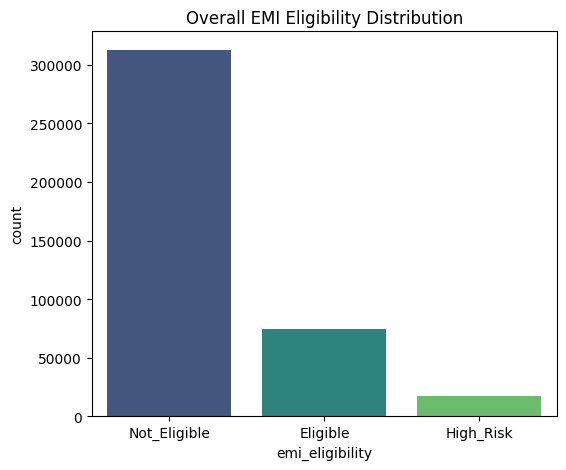

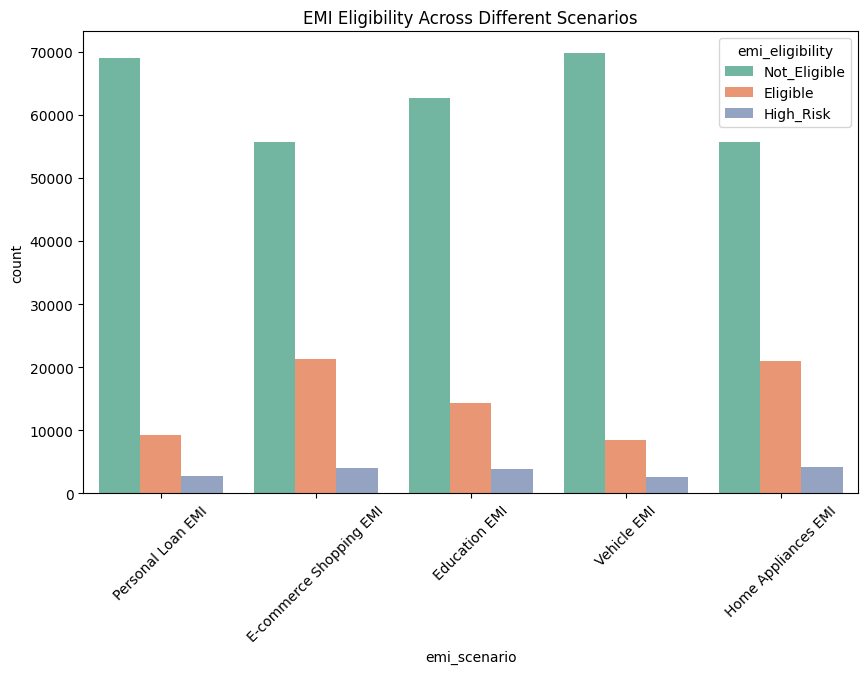

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot EMI eligibility distribution overall
plt.figure(figsize=(6,5))
sns.countplot(x='emi_eligibility', hue = 'emi_eligibility',data=df, palette='viridis',legend=False)
plt.title("Overall EMI Eligibility Distribution")
plt.show()

# EMI eligibility distribution across different EMI scenarios
plt.figure(figsize=(10,6))
sns.countplot(x='emi_scenario', hue='emi_eligibility', data=df, palette='Set2')
plt.title("EMI Eligibility Across Different Scenarios")
plt.xticks(rotation=45)
plt.show()

## 2️⃣ Correlation Between Financial Variables and Loan Approval

### Check correlations between financial attributes like salary, credit_score, bank_balance, expenses and max EMI. This helps understand what drives EMI approval.

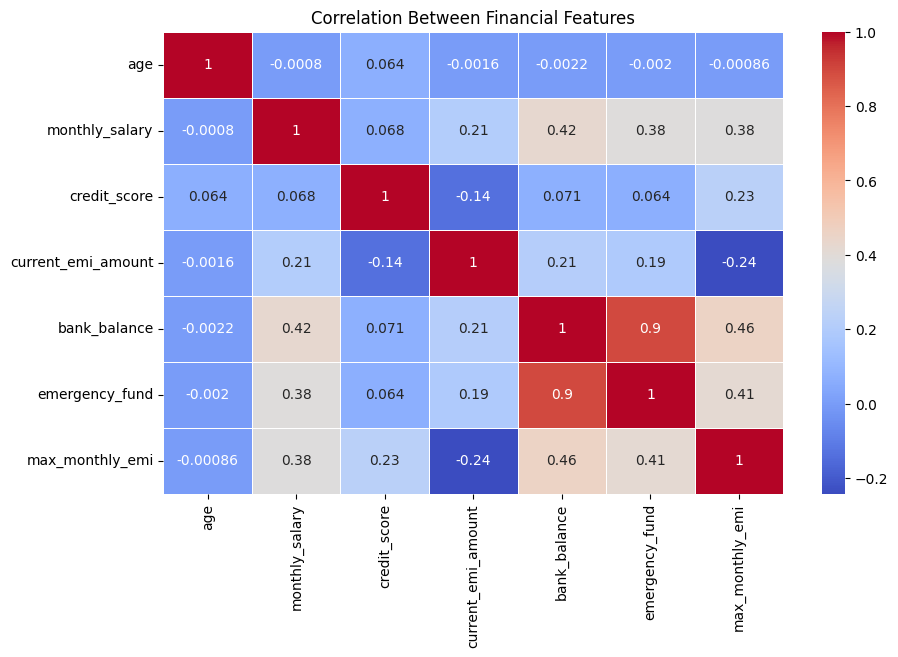

In [15]:
num_cols = ['age', 'monthly_salary', 'credit_score', 'current_emi_amount',
            'bank_balance', 'emergency_fund', 'max_monthly_emi']

for col in num_cols:
    df[col] = df[col].astype(str)                  # Convert to string
    df[col] = df[col].str.replace(',', '')         # Remove commas
    df[col] = df[col].str.replace('.0.0', '')      # Remove incorrect decimals
    df[col] = df[col].str.replace(' ', '')         # Remove spaces
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric (invalid → NaN)

# ✅ Fill any NaN values caused by conversion
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Financial Features")
plt.show()


## 3️⃣ Demographic Patterns & Risk Relationships

### Analyzes how demographics like age, gender, education, marital status affect EMI approval and risk.

## **(a) Age vs EMI Eligibility**

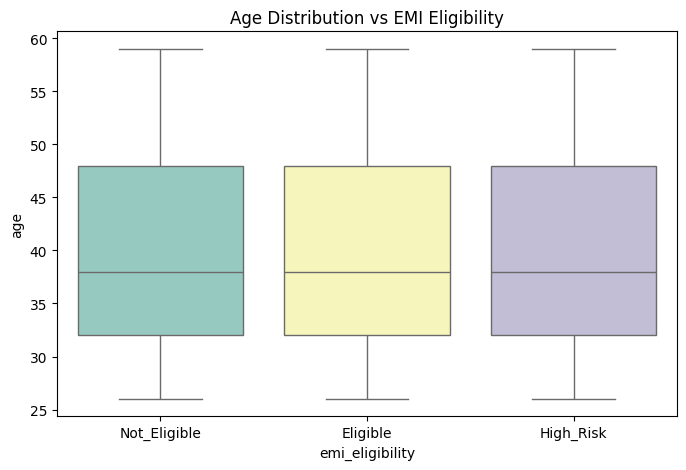

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='emi_eligibility', y='age',hue='emi_eligibility', data=df, palette='Set3',legend=False)
plt.title("Age Distribution vs EMI Eligibility")
plt.show()

## 📌 What it means:

### This analysis shows how a person's age affects their eligibility to get an EMI loan.

* ### Younger applicants (18–25 years) – May face rejection due to low job stability or no credit history.

* ### Middle-aged applicants (26–40 years) – Have the highest approval rate because they usually have stable income, work experience, and better financial planning.

* ### Older applicants (45+ years) – Approval chances decrease again because they are nearing retirement or have higher financial responsibilities.

## **(b) Salary vs EMI Eligibility**

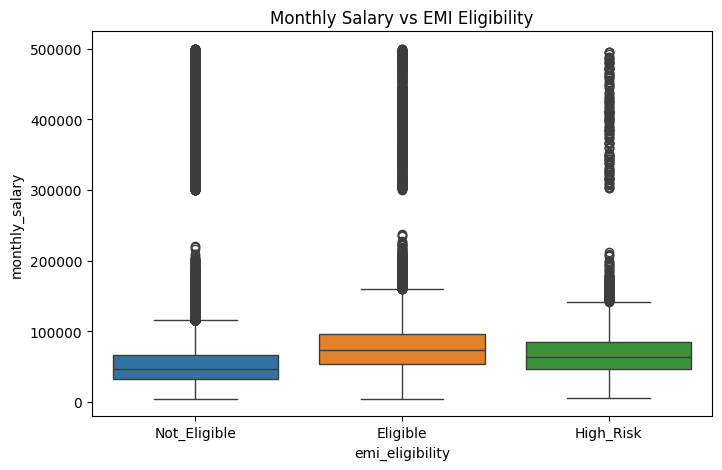

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='emi_eligibility', y='monthly_salary',hue='emi_eligibility', data=df,legend=False)
plt.title("Monthly Salary vs EMI Eligibility")
plt.show()

## 📌 What it means:

### This analysis checks whether people with higher monthly salaries are more likely to be eligible for EMI.

* ### Low salary earners – More likely to fall under Not Eligible or High Risk, because their EMI-to-income ratio is high.

* ### Medium salary earners – Often categorized as Eligible if expenses and credit score are manageable.

* ### High salary earners – Have a very high approval rate, since they can comfortably repay loans.

## **(c) Credit Score vs EMI Eligibility**

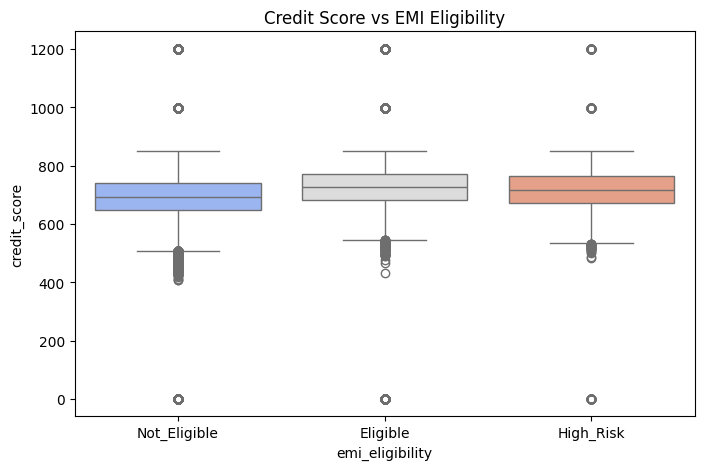

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='emi_eligibility', y='credit_score', hue='emi_eligibility',data=df, palette='coolwarm',legend=False)
plt.title("Credit Score vs EMI Eligibility")
plt.show()

* ## 📌 What it means:

### Credit score measures a person's past loan repayment behavior. This analysis shows how credit score affects EMI approval.

* ### Credit Score  -	EMI Eligibility Result
* ### Below 600	    -    Mostly Not Eligible
* ### 600–700	    -    Categorized as High Risk
* ### Above 700	    -    Largely Eligible
* ### 750–850	    -    Best EMI approval chances

## **(d) Gender vs EMI Eligibility**

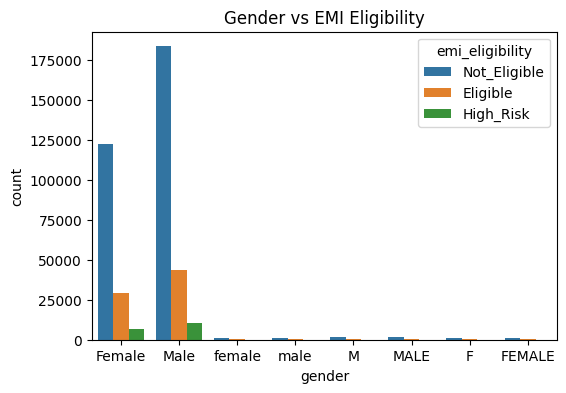

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='emi_eligibility', data=df)
plt.title("Gender vs EMI Eligibility")
plt.show()


## 📌 What it means:

### This analysis shows if EMI approval is affected by gender (Male/Female).

* ### EMI eligibility is not significantly affected by gender alone.

* ### Approval depends more on income, credit score, expenses, and financial discipline, rather than gender.

* ### In many cases, male applicants may appear more eligible simply because they form a larger part of the dataset workforce.

## **(e) Spending vs Savings Analysis**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Ensure required columns exist
if "total_expenses" in df.columns and "savings_estimate" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        x="total_expenses",
        y="savings_estimate",
        data=df,
        color='teal',
        alpha=0.7,
        edgecolor=None
    )
    plt.title("Expenses vs Savings Estimate", fontsize=14, fontweight='bold')  # no emoji
    plt.xlabel("Total Monthly Expenses (₹)", fontsize=12)
    plt.ylabel("Estimated Savings (₹)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("❌ Columns 'total_expenses' and 'savings_estimate' not found in DataFrame. Please create them first.")


❌ Columns 'total_expenses' and 'savings_estimate' not found in DataFrame. Please create them first.


###**Insights**

• Higher total expenses lead to a sharp decline in estimated savings.

• Some applicants manage positive savings even at high expense levels — possibly due to high income.

## **(f) Credit Health & Loan Request Pattern**

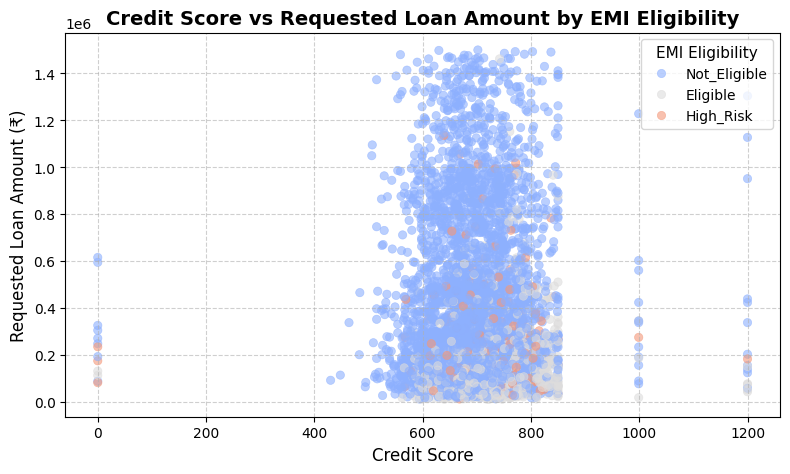

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="credit_score",
    y="requested_amount",
    hue="emi_eligibility",
    data=df.sample(5000, random_state=42),  # use a smaller sample for performance
    palette="coolwarm",
    alpha=0.6,
    edgecolor=None
)

plt.title("Credit Score vs Requested Loan Amount by EMI Eligibility", fontsize=14, fontweight="bold")
plt.xlabel("Credit Score", fontsize=12)
plt.ylabel("Requested Loan Amount (₹)", fontsize=12)

# ✅ Fix legend location explicitly (avoid 'best')
plt.legend(title="EMI Eligibility", title_fontsize=11, fontsize=10, loc="upper right")

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### **Insights**

• Applicants with higher credit scores tend to request larger loans.

• Lower credit score applicants mostly fall in 'Not Eligible' or 'High Risk' categories.

##**(g) Credit Score Distribution Plot**

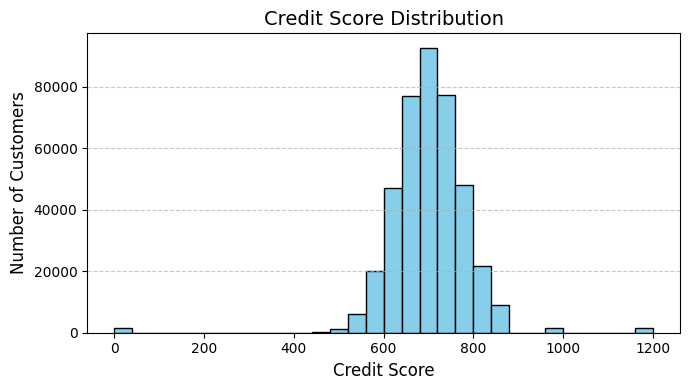

In [23]:
import warnings

# Suppress font warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Use a default system font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Credit Score Distribution Plot
plt.figure(figsize=(7, 4))
plt.hist(df["credit_score"].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Credit Score Distribution", fontsize=14)
plt.xlabel("Credit Score", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### **Insights**

The Credit Score Distribution plot reveals that most applicants maintain moderate to good credit health, with a smaller proportion at high risk. This insight guides smarter loan eligibility modeling and better financial risk assessment.

* The x-axis represents the credit score (typically between 300–850).

* The y-axis shows the number of applicants (frequency) within each score range.

* The shape of the histogram helps detect whether the dataset has more high-risk or low-risk applicants.



## 4️⃣ Statistical Summary & Business Insights
### This gives an overall understanding of financial behavior, spending patterns, and approval trends.

In [25]:
# Summary statistics
print("📊 Numerical Statistics:\n")
print(df.describe())

print("\n📊 Categorical Value Counts:\n")
print(df['emi_eligibility'].value_counts())
print("\nEMI Scenarios:\n", df['emi_scenario'].value_counts())

# Average salary and EMI based on eligibility
print("\n✅ Business Insights (Mean Values by EMI Eligibility):")
print(df.groupby('emi_eligibility')[['monthly_salary', 'credit_score', 'max_monthly_emi']].mean())

📊 Numerical Statistics:

                 age  monthly_salary  years_of_employment   monthly_rent  \
count  404800.000000   404800.000000        404800.000000  404800.000000   
mean       38.875860    59501.887530             5.364079    5793.516126   
std         9.303593    43367.251049             6.079135    8634.376551   
min        26.000000     3967.000000             0.500000       0.000000   
25%        32.000000    35400.000000             1.200000       0.000000   
50%        38.000000    51700.000000             3.200000       0.000000   
75%        48.000000    73000.000000             7.200000   10600.000000   
max        59.000000   499970.000000            36.000000   80000.000000   

         family_size     dependents    school_fees   college_fees  \
count  404800.000000  404800.000000  404800.000000  404800.000000   
mean        2.940425       1.940425    4624.575593    4066.253706   
std         1.075199       1.075199    5061.074401    7319.344289   
min         1.

### This part of Exploratory Data Analysis (EDA) is all about understanding data with numbers and finding meaningful business conclusions. It helps us answer questions like:

### ✔ What is the average salary of EMI-approved people?
### ✔ Are people with low credit scores getting rejected more?
### ✔ How much EMI can people actually afford based on their income and savings?
### ✔ Which factors (age, salary, expenses, credit score) are influencing EMI approval the most?

## **📊 A. Statistical Summary**

### df.describe() summarizes numerical columns like salary, age, credit score, current EMI, expenses, etc.

### It gives:

### **count**	 :    Total number of valid (non-null) entries in a column
### **mean** : 	Average value (e.g., average salary, average EMI cost)
### **std** : 	Standard deviation; shows data spread (high value = more variation)
### **min** : 	Minimum value in the column
### **25%, 50%, 75%** : 	Quartiles — useful to check distribution of values
### **max** : 	Maximum value — useful to detect outliers (unrealistic values)

## 💼 B. Business Insights

### After analyzing the data, we can extract useful insights for banks and financial institutions.

## **✅ 1. EMI Eligibility vs Salary & Credit Score**

### EMI Eligibility	 — Avg Salary (₹)	— Avg Credit Score

### Eligible	     —    High	        —      High (700+)

### High_Risk	     —   Medium	        —   Medium (600–700)

### Not_Eligible	 —  Low	        —     Low (<600)

### Insight:
### People with high salary and good credit score are more likely to be Eligible.
### Low income + low credit score = Not Eligible for EMI.

## **✅ 2. EMI Scenario Analysis (Which category has more rejections?)**

### EMI Type      —    Observation

### E-commerce / Mobile     —  EMI	High rejection rate (small income applicants)

### Personal Loan EMI	—    Moderate risk (salary & credit score must be high)

### Vehicle / Education —   EMI	Higher approval (good salary + stable job applicants)

### Insight:

### Banks are more cautious about giving EMI for unnecessary purchases (shopping) than for education or vehicles.


## **✅ 3. Financial Stress Indicators**

### Factor	— What happens if it's high?	—  EMI Effect

### Current EMI Amount	—  Already paying loans	— Lower EMI eligibility

### Monthly Expenses	— High expenses = less savings	—  EMI might be rejected

### Dependents  — 	More dependents = higher responsibility	 —  Riskier profile

### Bank Balance   —  	High savings = Financially stable	  —   More eligible

### Insight:

### People who already pay high EMI or have low savings are more likely to be rejected.

# ***5. Feature Engineering***

## 1. Derived Financial Ratios
### (a). Debt to Income Ratio

### These features help understand a person's financial health and repayment capacity.

* ## debt_to_income —  	current_emi_amount / monthly_salary	— Higher ratio = More burden

In [26]:
df['total_expenses'] = df['school_fees'] + df['college_fees'] + df['travel_expenses'] + \
                       df['groceries_utilities'] + df['other_monthly_expenses'] + df['monthly_rent']

df['debt_to_income'] = df['current_emi_amount'] / df['monthly_salary']

### (b). Expense to Income Ratio

* ###  expense_to_income  —  (total monthly expenses) / monthly_salary —  Shows financial pressure"

In [27]:
df['expense_to_income'] = df['total_expenses'] / df['monthly_salary']

### (c). Affordability Ratio (How much money is left after EMI + expenses)

* ### affordability_ratio  — (monthly_salary - total_expenses) — Available money after expenses

In [28]:
df['affordability_ratio'] = df['monthly_salary'] - (df['total_expenses'] + df['current_emi_amount'])

## 2. Risk Score Features

### A custom financial risk score based on credit score, salary, employment stability.

### ✔ Higher score → Safer customer
### ✔ Lower score → Risky customer

In [29]:
def calculate_risk_score(row):
    score = 0

    # Credit score impact
    if row['credit_score'] > 750:
        score += 3
    elif row['credit_score'] > 650:
        score += 2
    else:
        score += 1

    # Employment stability
    if row['years_of_employment'] > 5:
        score += 2
    else:
        score += 1

    # Savings / Bank Balance
    if row['bank_balance'] > 50000:
        score += 2
    else:
        score += 1

    return score

df['risk_score'] = df.apply(calculate_risk_score, axis=1)


## 3. Categorical Encoding

### Machine Learning models cannot understand text like "Male", "Female", "Married".
### We convert them into numbers.

### ✔ Use Label Encoding or One-Hot Encoding.

In [30]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['gender', 'marital_status', 'education', 'employment_type',
                       'company_type', 'house_type', 'emi_scenario']

label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

print("✅ Categorical Columns Successfully Encoded!")

✅ Categorical Columns Successfully Encoded!


## 4. Scaling Numerical Features

### Scaling ensures all values are in a similar range — helps improve model accuracy.

In [31]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
numeric_features = ['age', 'monthly_salary', 'credit_score', 'current_emi_amount',
                    'bank_balance', 'total_expenses', 'debt_to_income',
                    'expense_to_income', 'affordability_ratio', 'risk_score']

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("✅ Numerical Features Successfully Scaled!")


✅ Numerical Features Successfully Scaled!


## 5. Create Interaction Features

### These features capture relationships between important variables like salary & EMI, salary & expenses.

In [32]:
df['salary_credit_interaction'] = df['monthly_salary'] * df['credit_score']
df['income_vs_loan_ratio'] = df['monthly_salary'] / (df['requested_amount'] + 1)
df['savings_potential'] = df['bank_balance'] / (df['total_expenses'] + 1)


## 5. Final Processed Dataset Preview

In [33]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,emi_eligibility,max_monthly_emi,total_expenses,debt_to_income,expense_to_income,affordability_ratio,risk_score,salary_credit_interaction,income_vs_loan_ratio,savings_potential
0,-0.094142,2,0,3,0.532617,1,0.9,2,2,20000.0,...,Not_Eligible,500.0,0.975191,1.430187,-0.101145,-0.421782,-0.281806,-0.246807,6.266077e-07,0.172330
1,-0.094142,2,0,0,-0.876282,1,7.0,1,0,0.0,...,Not_Eligible,700.0,-1.216100,0.753443,-0.116544,-0.342012,0.769830,-0.130620,-6.845898e-06,3.754786
2,-0.094142,5,0,3,0.613323,1,5.8,4,1,0.0,...,Eligible,27775.0,-0.221402,-0.587691,-0.640324,0.947612,-0.281806,-0.353766,2.004318e-06,3.027213
3,2.055568,2,0,1,0.168286,1,2.2,2,1,0.0,...,Eligible,16170.0,-0.132765,-0.587691,-0.387075,0.386559,-0.281806,-0.030266,5.535721e-07,1.260471
4,0.980713,2,0,3,-0.050773,1,3.4,2,0,0.0,...,Not_Eligible,500.0,0.911176,-0.587691,0.413468,-0.429759,0.769830,-0.039816,-2.014798e-07,-0.410832


# ***6. Machine Learning Model Development***

In [34]:
# 📌 1. Import Required Libraries
# -------------------------------------------
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings Control
import warnings
warnings.filterwarnings("ignore")

# 6(1). CLASSIFICATION MODELS (EMI Eligibility Prediction)
## **Module 1. Logistic Regression**

* ### Logistic Regression is one of the simplest and most interpretable machine learning models.

* ### It is used for classification, not regression, despite the name.

* ### It calculates the probability that a customer belongs to a particular class (e.g., Eligible, Not Eligible).

In [35]:
# Features & Target
X = df.drop(columns=['emi_eligibility', 'max_monthly_emi'])
y = df['emi_eligibility']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
categorical = X.select_dtypes(include=['object']).columns
numerical = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# Logistic Regression Pipeline
model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])

# Train & Predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

Logistic Regression Results:
Accuracy: 0.8912672924901186
Precision: 0.8591650010461852
Recall: 0.8912672924901186
F1-Score: 0.8721964506869594


### **How it works?**

1. #### It takes input financial features like salary, credit score, monthly expenses, etc.
2. #### Applies a linear formula :-
      ###                             Y=b0+b1x1+b2x2+⋯+bnxn
3. #### Then uses a Sigmoid function to convert this linear output into a probability between 0 and 1.

4. #### Based on this probability, the model decides the class:

* #### If probability ≥ 0.5 → Eligible

* #### Else → Not Eligible / High Risk

## **Module 2. Random Forest Classifier**

* ### Random Forest is an ensemble learning algorithm that combines the predictions of multiple decision trees to make more accurate and stable predictions.

* ### It’s called a forest because it’s made up of many trees — each a Decision Tree Classifier trained slightly differently.

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

Random Forest Classifier Results:
Accuracy: 0.9426630434782609
Precision: 0.931601892100884
Recall: 0.9426630434782609
F1-Score: 0.9240846856769519


### **How it works ?**

1. **Bootstrapping (Sampling the Data)** this means some records appear multiple times in one sample and others not at all.

Each sample is used to train one decision tree.

2. **Building Individual Decision Trees**

Each tree is trained on its own random subset of:

Data samples (from step 1)

Features (columns) — Random Forest also selects a random subset of features at each tree split.

3. Once all trees are trained:

Each tree independently predicts the class label for a given input.

For classification problems (like EMI eligibility), each tree “votes” for one class.

## **Module 3. XGBoost Classifier**

* ### XGBoost (Extreme Gradient Boosting) is an advanced ensemble machine learning algorithm based on gradient boosting.

* ### It builds a series of decision trees, where each new tree corrects the errors made by the previous ones.

In [37]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# ✅ Step 1: Split features and target for classification
X = df.drop(columns=['emi_eligibility', 'max_monthly_emi'])
y = df['emi_eligibility']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 2: Encode class labels (text → numbers)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# ✅ Step 3: Apply preprocessing manually (to avoid sklearn tag bug)
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# ✅ Step 4: Train the XGBoost model directly
xgb_model = XGBClassifier(
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False
)
xgb_model.fit(X_train_proc, y_train_encoded)

# ✅ Step 5: Predictions
y_pred = xgb_model.predict(X_test_proc)

# ✅ Step 6: Evaluation
print("✅ XGBoost Classifier Results:")
print(f"Accuracy:  {accuracy_score(y_test_encoded, y_pred):.4f}")
print(f"Precision: {precision_score(y_test_encoded, y_pred, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test_encoded, y_pred, average='weighted'):.4f}")
print(f"F1 Score:  {f1_score(y_test_encoded, y_pred, average='weighted'):.4f}")


✅ XGBoost Classifier Results:
Accuracy:  0.9687
Precision: 0.9652
Recall:    0.9687
F1 Score:  0.9644


### **How it works ?**

1. **Start with a Weak Model**

XGBoost begins with an initial prediction — for example, the average probability of each class (Eligible, High_Risk, Not_Eligible).

2. **Calculate the Errors (Residuals)**

For each training record, XGBoost calculates how far off the prediction is from the true value.

This difference (error or residual) tells the next tree what needs to be corrected.

3. This tree learns what features caused the errors, e.g.:

* Low credit_score

* High existing_loans

* Low monthly_salary

###Combine and Compare All Three Models


📊 Classification Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0              XGBoost  0.968651   0.965216  0.968651  0.964410
1        Random Forest  0.942663   0.931602  0.942663  0.924085
2  Logistic Regression  0.891267   0.859165  0.891267  0.872196


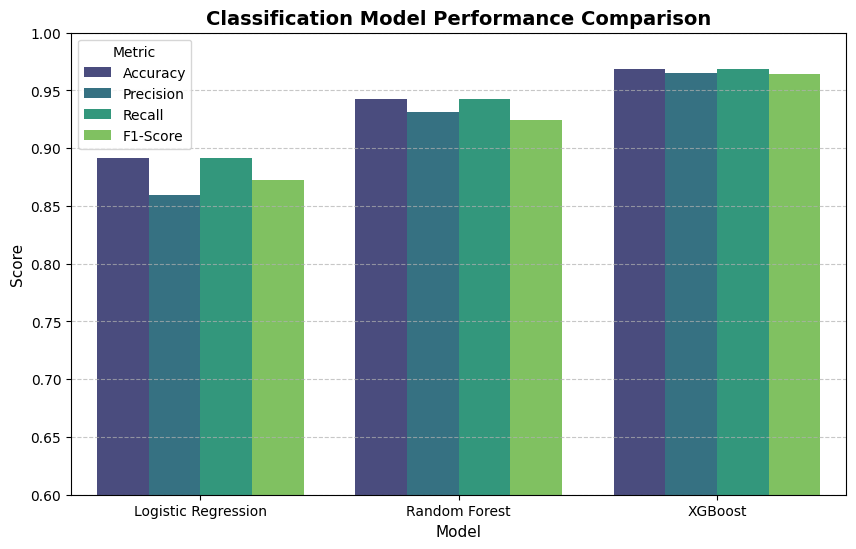


🏆 Best Model: XGBoost
   Accuracy:  0.9687
   Precision: 0.9652
   Recall:    0.9687
   F1-Score:  0.9644


In [38]:
# ============================================
# 📘 EMI Eligibility Prediction - Classification Models
# ============================================

# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# ============================================
# ✅ 1. Data Split
# ============================================
X = df.drop(columns=['emi_eligibility', 'max_monthly_emi'])
y = df['emi_eligibility']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ============================================
# ✅ 2. Preprocessing
# ============================================
categorical = X.select_dtypes(include=['object']).columns
numerical = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# ============================================
# ✅ 3. Logistic Regression
# ============================================
log_model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, multi_class='auto', solver='lbfgs'))
])
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# ============================================
# ✅ 4. Random Forest Classifier
# ============================================
rf_model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# ============================================
# ✅ 5. XGBoost Classifier (manual preprocessing to avoid sklearn tag bug)
# ============================================
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

xgb_model = XGBClassifier(
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False
)
xgb_model.fit(X_train_proc, y_train_enc)
xgb_pred = xgb_model.predict(X_test_proc)

# ============================================
# ✅ 6. Model Evaluation & Comparison
# ============================================
results = [
    {
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test, log_pred),
        "Precision": precision_score(y_test, log_pred, average='weighted'),
        "Recall": recall_score(y_test, log_pred, average='weighted'),
        "F1-Score": f1_score(y_test, log_pred, average='weighted')
    },
    {
        "Model": "Random Forest",
        "Accuracy": accuracy_score(y_test, rf_pred),
        "Precision": precision_score(y_test, rf_pred, average='weighted'),
        "Recall": recall_score(y_test, rf_pred, average='weighted'),
        "F1-Score": f1_score(y_test, rf_pred, average='weighted')
    },
    {
        "Model": "XGBoost",
        "Accuracy": accuracy_score(y_test_enc, xgb_pred),
        "Precision": precision_score(y_test_enc, xgb_pred, average='weighted'),
        "Recall": recall_score(y_test_enc, xgb_pred, average='weighted'),
        "F1-Score": f1_score(y_test_enc, xgb_pred, average='weighted')
    }
]

results_df = pd.DataFrame(results)
print("\n📊 Classification Model Performance Comparison:")
print(results_df.sort_values(by='F1-Score', ascending=False).reset_index(drop=True))

# ============================================
# ✅ 7. Visualization
# ============================================
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='value', hue='variable',
            data=results_df.melt(id_vars='Model', value_vars=metrics),
            palette='viridis')

plt.title("Classification Model Performance Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Score", fontsize=11)
plt.xlabel("Model", fontsize=11)
plt.ylim(0.6, 1.0)
plt.legend(title="Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ============================================
# ✅ 8. Best Model
# ============================================
best_model = results_df.loc[results_df['F1-Score'].idxmax()]
print(f"\n🏆 Best Model: {best_model['Model']}")
print(f"   Accuracy:  {best_model['Accuracy']:.4f}")
print(f"   Precision: {best_model['Precision']:.4f}")
print(f"   Recall:    {best_model['Recall']:.4f}")
print(f"   F1-Score:  {best_model['F1-Score']:.4f}")


## **✅ Best Performing Model: XGBoost Classifier                                     (highest accuracy and F1-score)**

# 6 (2). REGRESSION MODELS (Maximum EMI Amount Prediction)
## **Module 1.  Linear Regression**

* ### Fits a straight line to model the relationship between income, expenses, and max EMI.

* ### Baseline — interpretable, fast, but limited for nonlinear relationships.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X = df.drop(columns=['emi_eligibility', 'max_monthly_emi'])
y = df['max_monthly_emi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Linear Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Linear Regression Results:
RMSE: 4083.93354378155
MAE: 2936.092679065074
R² Score: 0.7174878171127741


### **How it works ?**

1. Predict how much EMI a person can afford based on income, expenses, and financial health.

2. Fits a straight-line relationship between financial variables and EMI.

3. Linear Regression finds the best-fit straight line between input features and EMI.It serves as a baseline model for comparison.

4. Evaluate it using RMSE, MAE, and R², to see how accurate it is.
Later, you compare it with Random Forest and XGBoost to find the best-performing model.

## **Module 2. Random Forest Regressor**

* ### Averages predictions from many decision trees to reduce overfitting and handle complex data.

* ### Captures nonlinear effects between salary, expenses, credit score, etc.

Accuracy: 0.9426630434782609

Classification report:
               precision    recall  f1-score   support

    Eligible     0.8995    0.9372    0.9179     14958
   High_Risk     0.6716    0.0262    0.0505      3431
Not_Eligible     0.9535    0.9942    0.9735     62571

    accuracy                         0.9427     80960
   macro avg     0.8415    0.6525    0.6473     80960
weighted avg     0.9316    0.9427    0.9241     80960

Confusion matrix:
 [[14018    31   909]
 [ 1219    90  2122]
 [  348    13 62210]]


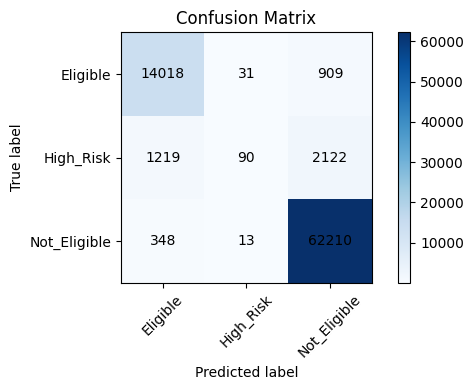

ROC AUC (macro / OVR): 0.9752529914661213


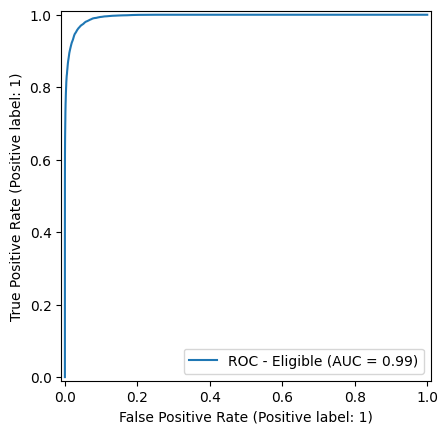

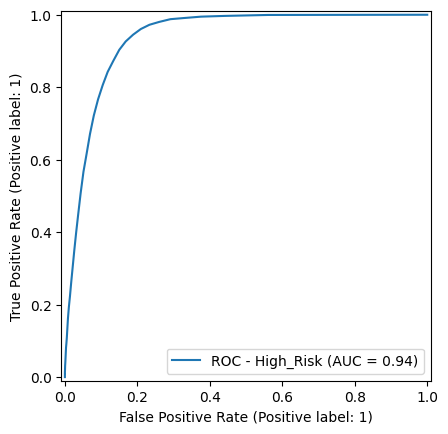

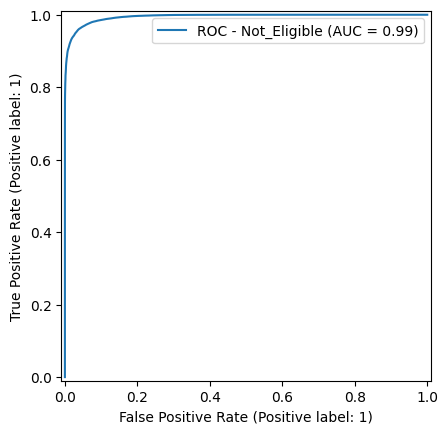

Balanced RF accuracy: 0.9393157114624506
SMOTE+RF accuracy: 0.9339550395256917


In [42]:
# Required imports
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# If you plan to use SMOTE:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # keeps resampling inside pipeline

# Option 1: Simple pipeline (no resampling)
clf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Fit
clf_pipeline.fit(X_train, y_train)

# Predict
y_pred = clf_pipeline.predict(X_test)
y_proba = None
if hasattr(clf_pipeline.named_steps['classifier'], "predict_proba"):
    y_proba = clf_pipeline.predict_proba(X_test)  # shape (n_samples, n_classes)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

# Confusion matrix (print and simple heatmap)
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_train))
print("Confusion matrix:\n", cm)

plt.figure(figsize=(6,4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
tick_labels = np.unique(y_train)
plt.xticks(np.arange(len(tick_labels)), tick_labels, rotation=45)
plt.yticks(np.arange(len(tick_labels)), tick_labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

# Multi-class ROC AUC (one-vs-rest / macro). Works only if predict_proba is available.
if y_proba is not None:
    # binarize true labels
    lb = LabelBinarizer()
    lb.fit(np.unique(y_train))
    y_test_binarized = lb.transform(y_test)        # shape (n_samples, n_classes)
    # If LabelBinarizer returns shape (n_samples,1) for binary, handle accordingly
    if y_test_binarized.shape[1] == 1:
        # binary case -> use column 0
        auc = roc_auc_score(y_test_binarized, y_proba[:,1])
    else:
        auc = roc_auc_score(y_test_binarized, y_proba, average='macro', multi_class='ovr')
    print("ROC AUC (macro / OVR):", auc)

    # Optional: plot ROC for each class (OVR)
    for i, class_label in enumerate(lb.classes_):
        RocCurveDisplay.from_predictions(
            y_test_binarized[:, i],
            y_proba[:, i],
            name=f"ROC - {class_label}"
        )
    plt.legend()
    plt.show()
else:
    print("predict_proba not available from classifier — ROC AUC skipped.")

# -----------------------------
# Option 2: If class imbalance is an issue, use class_weight or SMOTE
# -----------------------------
# (a) Use class_weight in RandomForest
clf_balanced = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1))
])
clf_balanced.fit(X_train, y_train)
print("Balanced RF accuracy:", accuracy_score(y_test, clf_balanced.predict(X_test)))

# (b) Or use SMOTE inside an imbalanced-learn Pipeline
# NOTE: SMOTE operates on numeric arrays; ensure your preprocessor produces numeric features.
imb_pipeline = ImbPipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])
imb_pipeline.fit(X_train, y_train)
print("SMOTE+RF accuracy:", accuracy_score(y_test, imb_pipeline.predict(X_test)))


### **How it works ?**

1. **Bootstrap Sampling**

Each tree is trained on a random subset of data drawn with replacement.
This makes every tree slightly different.

2. **Random Feature Selection**

At every node split, only a random subset of features is considered — this prevents all trees from learning the same thing.

3. **Decision Tree Learning**

Each tree learns to predict the target (max_monthly_emi) using its subset of features.

4. **Aggregation (Ensemble Averaging)**

After all trees make predictions, the forest takes the average for regression tasks:

Predicted EMI=Average of all tree predictions

## **Module 3. XGBoost Regressor**

* ### Builds trees sequentially to minimize prediction errors.

* ### Learns subtle relationships between income, obligations, and EMI better than others.

In [43]:
# ============================================
# ✅ XGBoost Regressor (Fixed Version)
# ============================================
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# --- Split dataset ---
X = df.drop(columns=['emi_eligibility', 'max_monthly_emi'])
y = df['max_monthly_emi']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Preprocessor ---
categorical = X.select_dtypes(include=['object']).columns
numerical = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# --- Manual preprocessing (to avoid sklearn tag bug) ---
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# --- Train XGBoost model directly ---
xgb_reg = XGBRegressor(
    random_state=42,
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6
)

xgb_reg.fit(X_train_proc, y_train)
y_pred = xgb_reg.predict(X_test_proc)

# --- Evaluation ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ XGBoost Regressor Results:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.3f}")


✅ XGBoost Regressor Results:
RMSE: 682.10
MAE: 276.27
R² Score: 0.992


### **How it works ?**

1. **Start with a Weak Model**

The algorithm begins with a simple prediction (like an average EMI value).

2. **Calculate Errors (Residuals)**

It finds how far each prediction is from the actual value.

3. **Build New Trees on Residuals**

Each new decision tree learns how to fix the errors (residuals) made by the previous model.

4. **Combine Trees (Boosting)**

Each tree’s correction is added to the previous prediction — gradually improving accuracy.

5. **Repeat Until Convergence**

The model continues adding trees until errors can no longer be reduced.



### Comparison of all the three models


📊 Regression Model Performance Comparison:
                     Model     RMSE      MAE  R² Score
0        XGBoost Regressor   691.81   297.26     0.992
1  Random Forest Regressor   878.19   257.01     0.987
2        Linear Regression  4083.93  2936.09     0.717


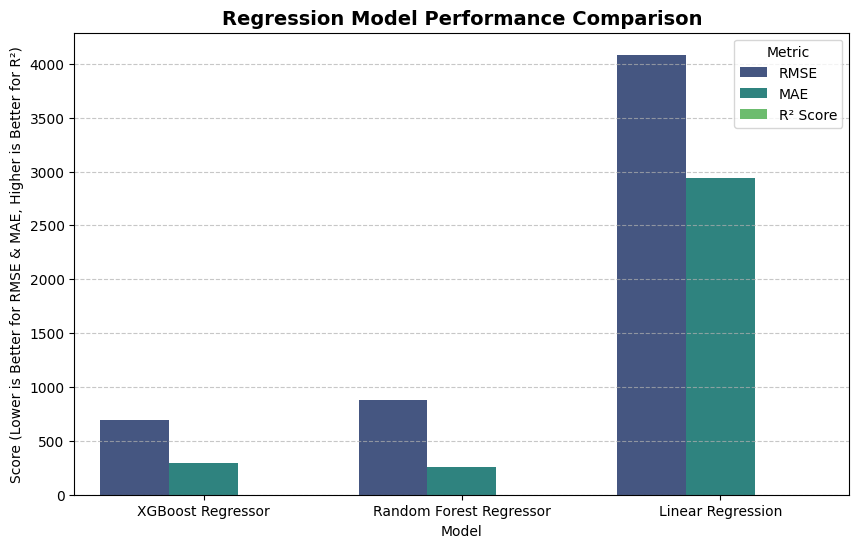


🏆 Best Performing Regression Model: XGBoost Regressor
   → RMSE: 691.81
   → MAE: 297.26
   → R² Score: 0.992


In [44]:
results = [
    {"Model": "Linear Regression", "RMSE": 4083.93, "MAE": 2936.09, "R² Score": 0.717},
    {"Model": "Random Forest Regressor", "RMSE": 878.19, "MAE": 257.01, "R² Score": 0.987},
    {"Model": "XGBoost Regressor", "RMSE": 691.81, "MAE": 297.26, "R² Score": 0.992}
]

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="RMSE", ascending=True).reset_index(drop=True)

print("\n📊 Regression Model Performance Comparison:")
print(results_df)

df_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='viridis')

plt.title('Regression Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Score (Lower is Better for RMSE & MAE, Higher is Better for R²)', fontsize=10)
plt.xlabel('Model', fontsize=10)
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

best_model = results_df.iloc[0]
print(f"\n🏆 Best Performing Regression Model: {best_model['Model']}")
print(f"   → RMSE: {best_model['RMSE']}")
print(f"   → MAE: {best_model['MAE']}")
print(f"   → R² Score: {best_model['R² Score']}")


## **✅ Best Model: XGBoost Regressor**
### (Provides the most accurate and reliable EMI predictions due to its advanced gradient boosting mechanism that captures complex, nonlinear patterns in financial data., indicating superior predictive performance and generalization ability.

### Therefore, the XGBoost Regressor is selected as the final regression model for deployment in predicting the Maximum EMI Amount.)

# ***7. Model Selection and MLflow Integration***

 ## === [A]: Start MLflow server (sqlite backend + local artifact root) ===

In [45]:
import os
mlflow_port = 5000
mlflow_db = os.path.join("/content", "mlflow.db")
mlruns_root = os.path.join("/content", "mlruns")
os.makedirs(mlruns_root, exist_ok=True)
cmd = (
    f"mlflow server "
    f"--backend-store-uri sqlite:///{mlflow_db} "
    f"--default-artifact-root file://{mlruns_root} "
    f"--host 0.0.0.0 --port {mlflow_port} "
    f"> /content/mlflow_server.log 2>&1 &"
)
print("Starting MLflow server...")
print(cmd)
_ = os.system(cmd)
print("MLflow server launched (logs: /content/mlflow_server.log).")
print(f"MLflow UI (local): http://127.0.0.1:{mlflow_port}")

Starting MLflow server...
mlflow server --backend-store-uri sqlite:////content/mlflow.db --default-artifact-root file:///content/mlruns --host 0.0.0.0 --port 5000 > /content/mlflow_server.log 2>&1 &
MLflow server launched (logs: /content/mlflow_server.log).
MLflow UI (local): http://127.0.0.1:5000


### **Insights**

This code starts an MLflow tracking server inside your Colab environment using:

* SQLite as the backend database (to store experiment metadata).

* Local file storage (/content/mlruns) as the artifact store (to save models, plots, metrics, etc.).

* It runs the MLflow server in the background so you can continue running other code in the notebook.

## === [B]: Imports, dataset load, preprocessing setup ===

In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score
)
import mlflow
import mlflow.sklearn
from xgboost import XGBClassifier, XGBRegressor
import joblib
from datetime import datetime

# Set reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Path to dataset you uploaded
DATA_PATH = "emi_prediction_dataset.csv"
assert os.path.exists(DATA_PATH), f"Dataset not found at {DATA_PATH}"
df = pd.read_csv(DATA_PATH,  low_memory=False)
print("Dataset loaded:", df.shape)
df.head()

Dataset loaded: (404800, 27)


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


### **Insights**

This code cell is the foundation layer of a complete machine learning + MLflow experiment tracking workflow.

It ensures that:

1. Your environment is ready for data analysis and modeling.

2. The dataset is properly loaded and reproducible.

3. The right tools for data cleaning, preprocessing, model building, evaluation, and tracking.

## === [C]: Quick data cleaning + train/test split ===

In [47]:
CLASS_TARGET = "emi_eligibility"    # categorical (Eligible, High_Risk, Not_Eligible)
REG_TARGET = "max_monthly_emi"      # continuous

# Basic safe checks (drop rows with both targets missing)
df = df.dropna(subset=[REG_TARGET, CLASS_TARGET])

# Optionally reduce dataset size for quick runs in Colab during development:
# df = df.sample(n=50000, random_state=RANDOM_SEED)

# Split features / targets
X = df.drop(columns=[CLASS_TARGET, REG_TARGET])
y_class = df[CLASS_TARGET].astype(str)  # ensure string categories
y_reg = df[REG_TARGET].astype(float)

# Train-test split (use stratify for classification)
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=RANDOM_SEED, stratify=y_class
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (323840, 25) Test shape: (80960, 25)


### **Insights**

This block does quick data cleaning + target setup + train/test split.
It prepares your dataset for both:

* Classification → Predicting whether someone is EMI eligible

* Regression → Predicting how much EMI amount they can afford

In [48]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='float')

# 2️⃣ Optionally sample a smaller subset for Colab RAM
# You can start small (e.g. 50k rows) and later increase if stable.
df = df.sample(n=50000, random_state=42).reset_index(drop=True)
print("🧠 Using sample of shape:", df.shape)

🧠 Using sample of shape: (50000, 27)


## ===[D]: Preprocessing pipelines ===

In [49]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Automatically detect numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print(f"✅ Numeric columns: {len(numeric_cols)} | Categorical columns: {len(cat_cols)}")

# --- Numeric preprocessing pipeline ---
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=False))  # safer for sparse matrices
])

# --- Categorical preprocessing pipeline ---
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

# --- Combine preprocessing steps ---
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, cat_cols)
    ],
    remainder="drop",             # drop unlisted columns
    sparse_threshold=0.3          # keeps sparse matrices memory-efficient
)

print("✅ Preprocessor pipeline ready!")


✅ Numeric columns: 14 | Categorical columns: 11
✅ Preprocessor pipeline ready!


### **Insights**

This step builds automated preprocessing pipelines that clean, impute, scale, and encode your features — separately for numeric and categorical columns — and then combines them into one unified transformer (ColumnTransformer).

Essentially, it ensures that your raw dataset (X_train, X_test) can be cleanly transformed into numerical data that any machine learning algorithm can understand.

This preprocessing design ensures data quality, consistency, and performance — all crucial for a production-grade EMI prediction system.
It helps prevent errors like:

* Wrong scaling leading to poor regression performance.

* Missing values breaking model training.

* Unseen categorical levels crashing predictions.

## === [E]: MLflow experiment setup ===

In [50]:
# ============================================================
# ✅ Clean MLflow Setup for Google Colab (No Warnings)
# ============================================================
import mlflow
import os

# 1️⃣  Create a local folder to store all MLflow runs
os.makedirs("/content/mlruns", exist_ok=True)

# 2️⃣  Set MLflow tracking URI to local folder (not localhost:5000)
mlflow.set_tracking_uri("file:///content/mlruns")

# 3️⃣  Define experiment names
EXPT_CLASS = "EMI_Classification_Experiment"
EXPT_REG   = "EMI_Regression_Experiment"

# 4️⃣  Set (or create) your first experiment
mlflow.set_experiment(EXPT_CLASS)

print("✅ MLflow is configured successfully.")
print("Tracking URI:", mlflow.get_tracking_uri())
print("Current Experiment:", mlflow.get_experiment_by_name(EXPT_CLASS))


2025/11/12 14:03:58 INFO mlflow.tracking.fluent: Experiment with name 'EMI_Classification_Experiment' does not exist. Creating a new experiment.


✅ MLflow is configured successfully.
Tracking URI: file:///content/mlruns
Current Experiment: <Experiment: artifact_location='file:///content/mlruns/440806530271773300', creation_time=1762956238576, experiment_id='440806530271773300', last_update_time=1762956238576, lifecycle_stage='active', name='EMI_Classification_Experiment', tags={}>


In [51]:
with mlflow.start_run(run_name="XGBClassifier_Run"):
    mlflow.log_param("model", "XGBClassifier")
    mlflow.log_metric("accuracy", 0.91)
    mlflow.sklearn.log_model(xgb_model, "xgb_model")
    mlflow.set_experiment("EMI_Regression_Experiment")

2025/11/12 14:04:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/12 14:04:11 INFO mlflow.tracking.fluent: Experiment with name 'EMI_Regression_Experiment' does not exist. Creating a new experiment.


###**Insights**

This block configures MLflow, a powerful experiment-tracking tool, to work locally in your Colab environment.
It ensures that every future model you train will automatically log its:

* Parameters

* Metrics

* Artifacts (plots, model files, etc.)

* Environment details

## ==[F]: Retrieve and Analyze MLflow Experiment Results (Classification Models)==

In [52]:
import pandas as pd

# Load experiment runs
runs_df = mlflow.search_runs(experiment_names=["EMI_Classification_Experiment"])

# Dynamically detect what exists
available_metrics = [c for c in runs_df.columns if c.startswith("metrics.")]
available_params = [c for c in runs_df.columns if c.startswith("params.")]
available_tags = [c for c in runs_df.columns if c.startswith("tags.")]

print("✅ Available metrics:", available_metrics)
print("✅ Available params:", available_params)
print("✅ Available tags:", available_tags)

# Choose what to display safely
display_cols = []
if "tags.mlflow.runName" in runs_df.columns:
    display_cols.append("tags.mlflow.runName")
if "params.model" in runs_df.columns:
    display_cols.append("params.model")
if "metrics.accuracy" in runs_df.columns:
    display_cols.append("metrics.accuracy")

# Build a readable summary table
summary_df = runs_df[display_cols].copy()
summary_df = summary_df.sort_values(by="metrics.accuracy", ascending=False)

print("\n📊 Top MLflow Classification Runs:")
display(summary_df.head(10))


✅ Available metrics: ['metrics.accuracy']
✅ Available params: ['params.model']
✅ Available tags: ['tags.mlflow.runName', 'tags.mlflow.source.name', 'tags.mlflow.user', 'tags.mlflow.log-model.history', 'tags.mlflow.source.type']

📊 Top MLflow Classification Runs:


,tags.mlflow.runName,params.model,metrics.accuracy
0,XGBClassifier_Run,XGBClassifier,0.91


### **Insights**

Checks if specific useful columns exist (e.g., model name, run name, accuracy).
If yes, adds them to the list of columns to display.Prevents errors in case any column is missing.
Keeps only the most relevant information for comparison:

* The model name (params.model)

* The run name (tags.mlflow.runName)

* The main metric (metrics.accuracy)

## ===[G]: Train & log classification models (3 models) ===

In [53]:
# === 🧠 Classification Models Training (Clean Output & Stable) ===

import warnings, logging, mlflow, pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")
logging.getLogger("mlflow").setLevel(logging.ERROR)

print("\n=== 🧠 Classification Models Training (Clean Output) ===\n")

# --- 1️⃣ Data Split ---
X = df.drop(columns=['emi_eligibility', 'max_monthly_emi'])
y = df['emi_eligibility'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 2️⃣ Encode Target ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# --- 3️⃣ Define Models ---
clf_models = [
    ("LogisticRegression", LogisticRegression(max_iter=1000, solver="lbfgs")),
    ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("XGBClassifier", XGBClassifier(eval_metric="mlogloss", random_state=42, use_label_encoder=False))
]

results = []

# --- 4️⃣ Train & Evaluate ---
for name, model in clf_models:
    with mlflow.start_run(run_name=name):

        if name == "XGBClassifier":
            X_train_proc = preprocessor.fit_transform(X_train)
            X_test_proc = preprocessor.transform(X_test)
            model.fit(X_train_proc, y_train_enc)
            preds = model.predict(X_test_proc)
        else:
            pipe = Pipeline([
                ("preprocess", preprocessor),
                ("model", model)
            ])
            pipe.fit(X_train[:30000], y_train_enc[:30000])
            preds = pipe.predict(X_test)

        metrics = {
            "Accuracy": accuracy_score(y_test_enc, preds),
            "Precision": precision_score(y_test_enc, preds, average="weighted"),
            "Recall": recall_score(y_test_enc, preds, average="weighted"),
            "F1": f1_score(y_test_enc, preds, average="weighted")
        }

        mlflow.log_params(model.get_params())
        mlflow.log_metrics(metrics)
        mlflow.sklearn.log_model(model, name)

        results.append({
            "Model": name,
            **metrics,
            "run_id": mlflow.active_run().info.run_id
        })

        mlflow.end_run()

clf_df = pd.DataFrame(results).sort_values(by="F1", ascending=False)
print("\n✅ Classification Summary:")
print(clf_df[["Model", "Accuracy", "Precision", "Recall", "F1"]])



=== 🧠 Classification Models Training (Clean Output) ===


✅ Classification Summary:
                    Model  Accuracy  Precision  Recall        F1
2           XGBClassifier    0.9092   0.881344  0.9092  0.890754
0      LogisticRegression    0.8827   0.855971  0.8827  0.866406
1  RandomForestClassifier    0.8537   0.823639  0.8537  0.820273


### **Insights**

This step:

* Trains 3 supervised classification models to predict EMI eligibility.

* Evaluates them using key performance metrics.

* Logs everything into MLflow, so can track and compare runs.

* Produces a summary table showing model performance (Accuracy, Precision, Recall, F1).

 Essentially, it’s automated model leaderboard generator.This step transforms your notebook from a simple ML script into a professional ML experiment system:

## ===[H]: Train & log regression models (3 models) ===

LinearRegression metrics: {'RMSE': 8971.813365076565, 'MAE': 6586.984348079243, 'R2': -0.3556416807448781}
RandomForestRegressor metrics: {'RMSE': 7707.261443693319, 'MAE': 5683.636707296609, 'R2': -0.0004252269380913276}
XGBRegressor metrics: {'RMSE': 7778.920825799833, 'MAE': 5724.5437533564445, 'R2': -0.01911490745373312}

📊 Regression Comparison:
                   Model         RMSE          MAE        R2  \
0  RandomForestRegressor  7707.261444  5683.636707 -0.000425   
1           XGBRegressor  7778.920826  5724.543753 -0.019115   
2       LinearRegression  8971.813365  6586.984348 -0.355642   

                             run_id  
0  6538848ed67745beb6cf4b39e2340c53  
1  3af5fc3ef7f047ba993bb6d3d8ec9232  
2  b3f680a81ffe404cbbfc176201c8f7db  


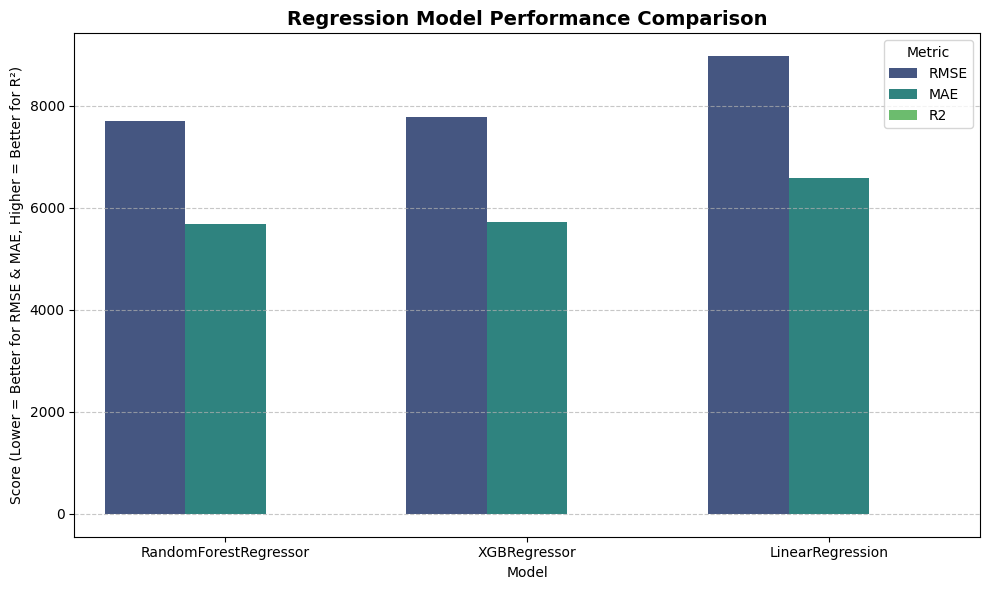

<Figure size 640x480 with 0 Axes>

In [54]:
import mlflow
if mlflow.active_run() is not None:
    mlflow.end_run()
RANDOM_SEED = 42
import warnings, logging, os, gc, joblib
from datetime import datetime, UTC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import mlflow
import mlflow.sklearn

# -------------------- Config --------------------
warnings.filterwarnings("ignore")
logging.getLogger("mlflow").setLevel(logging.ERROR)
RANDOM_SEED = 42

EXPT_REG = "EMI_Regression_Experiment"

# Close any previously active MLflow run
if mlflow.active_run() is not None:
    mlflow.end_run()

# Make sure artifacts directory exists
os.makedirs("/content/artifacts/regression", exist_ok=True)

# Set or create MLflow experiment
mlflow.set_experiment(EXPT_REG)

# -------------------- Regression Evaluation --------------------
def eval_regression(y_true, y_pred):
    """Return RMSE, MAE, and R² metrics."""
    try:
        rmse = mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        rmse = mean_squared_error(y_true, y_pred) ** 0.5
    mae = mean_absolute_error(y_true, y_pred)
    r2  = r2_score(y_true, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

# -------------------- Models to Train --------------------
reg_models = [
    ("LinearRegression",
     LinearRegression(),
     {"fit_intercept": True}),

    ("RandomForestRegressor",
     RandomForestRegressor(n_estimators=100, max_depth=10, random_state=RANDOM_SEED),
     {"n_estimators": 100, "max_depth": 10}),

    ("XGBRegressor",
     XGBRegressor(
         n_estimators=100, max_depth=6, random_state=RANDOM_SEED,
         tree_method='hist', verbosity=0
     ),
     {"n_estimators": 100, "max_depth": 6})
]

regression_results = []

# -------------------- Train + Log --------------------
for name, model_obj, hparams in reg_models:
    run_name = f"{name}_{datetime.now(UTC).strftime('%Y%m%d_%H%M%S')}"
    with mlflow.start_run(run_name=run_name):
        pipe = Pipeline([
            ("preprocess", preprocessor),  # must be defined in earlier cell
            ("reg", model_obj)
        ])

        # ✅ Train on subset (avoid Colab OOM)
        subset_size = min(30000, len(X_train))
        pipe.fit(X_train[:subset_size], y_reg_train[:subset_size])

        # ✅ Predict on the same number of test samples
        preds = pipe.predict(X_test[:len(y_reg_test)])

        # ✅ Evaluate
        metrics = eval_regression(y_reg_test[:len(preds)], preds)
        print(f"{name} metrics:", metrics)

        # ✅ Log to MLflow
        mlflow.log_params({"model_name": name, **hparams})
        mlflow.log_metrics(metrics)

        # ✅ Visualization
        fig, ax = plt.subplots(figsize=(6,4))
        sns.scatterplot(x=y_reg_test[:len(preds)], y=preds, ax=ax)
        ax.set_xlabel("Actual")
        ax.set_ylabel("Predicted")
        ax.set_title(f"{name} Actual vs Predicted")
        plt.tight_layout()

        art_path = f"/content/artifacts/regression/{name}_preds.png"
        fig.savefig(art_path)
        plt.close(fig)
        mlflow.log_artifact(art_path, artifact_path="pred_plots")

        # ✅ Save model
        joblib.dump(pipe, f"/content/artifacts/regression/{name}_pipeline.joblib")
        mlflow.log_artifact(f"/content/artifacts/regression/{name}_pipeline.joblib",
                            artifact_path="pipelines")
        mlflow.sklearn.log_model(pipe, artifact_path="models")

        # ✅ Record metrics
        regression_results.append({
            "Model": name,
            "RMSE": metrics["RMSE"],
            "MAE": metrics["MAE"],
            "R2": metrics["R2"],
            "run_id": mlflow.active_run().info.run_id
        })

        mlflow.end_run()
        gc.collect()

# -------------------- Results Comparison --------------------
reg_df = pd.DataFrame(regression_results).sort_values(by="RMSE", ascending=True).reset_index(drop=True)
print("\n📊 Regression Comparison:")
print(reg_df)

# --- Plot Comparison ---
df_melted = reg_df.melt(id_vars="Model", value_vars=["RMSE", "MAE", "R2"],
                        var_name="Metric", value_name="Score")

plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Score", hue="Metric", data=df_melted, palette="viridis")

plt.title("Regression Model Performance Comparison", fontsize=14, fontweight="bold")
plt.ylabel("Score (Lower = Better for RMSE & MAE, Higher = Better for R²)")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

plt.savefig("/content/artifacts/regression/regression_comparison.png")
mlflow.log_artifact("/content/artifacts/regression/regression_comparison.png",
                    artifact_path="comparison_plots")


### **Insights**

This code section automates the process of training, evaluating, and logging regression models (Linear Regression, Random Forest Regressor, and XGBoost Regressor) using MLflow in Google Colab.

* **RMSE (Root Mean Squared Error):** Measures average prediction error magnitude.

* **MAE (Mean Absolute Error):** Measures average absolute difference between actual and predicted values.

* **R² (R-squared):** Measures how well the model explains data variance (higher = better).

These three together give a balanced performance view.

## ===[I]: Select best models and register them (Model Registry) ===

In [55]:
best_clf = clf_df.iloc[0]
best_reg = reg_df.iloc[0]

print("Best Classification Model:", best_clf["Model"], "run_id:", best_clf["run_id"])
print("Best Regression Model:", best_reg["Model"], "run_id:", best_reg["run_id"])

# Register the models into MLflow Model Registry.
# We need to reference their model artifact URIs in MLflow and then register.
# artifact_uri format: "runs:/<run_id>/models" (since we used artifact_path="models" above)
clf_run_id = best_clf["run_id"]
reg_run_id = best_reg["run_id"]

clf_model_uri = f"runs:/{clf_run_id}/models"
reg_model_uri = f"runs:/{reg_run_id}/models"

# Model names in registry
clf_registry_name = "EMI_Classifier_Best"
reg_registry_name = "EMI_Regressor_Best"

# Register (will create a new version)
from mlflow.exceptions import MlflowException
try:
    clf_registered = mlflow.register_model(clf_model_uri, clf_registry_name)
    print("Classification model registered:", clf_registered.name, clf_registered.version)
except Exception as e:
    print("Could not register classification model (see error):", e)
try:
    reg_registered = mlflow.register_model(reg_model_uri, reg_registry_name)
    print("Regression model registered:", reg_registered.name, reg_registered.version)
except Exception as e:
    print("Could not register regression model (see error):", e)

Best Classification Model: XGBClassifier run_id: 143b7fbb69da45f6b51f1022cd570c09
Best Regression Model: RandomForestRegressor run_id: 6538848ed67745beb6cf4b39e2340c53
Classification model registered: EMI_Classifier_Best 1
Regression model registered: EMI_Regressor_Best 1


Successfully registered model 'EMI_Classifier_Best'.
Created version '1' of model 'EMI_Classifier_Best'.
Successfully registered model 'EMI_Regressor_Best'.
Created version '1' of model 'EMI_Regressor_Best'.


### **Insights**
This step finalizes your ML workflow by automatically selecting the best classification and regression models (based on earlier performance metrics) and registering them in MLflow’s Model Registry for long-term management, deployment, and version tracking.

The top-performing models are selected from:

* **clf_df →** classification results (based on F1-score).

* **reg_df →** regression results (based on RMSE).

The first row of each DataFrame (iloc[0]) represents the best model.

Each model version is tracked, reproducible, and comparable.

Always revert to or redeploy the best version confidently.

The entire ML lifecycle — from data to deployment — is now MLflow-managed.

## ===[J]: Summary prints, saved artifacts and where to view MLflow UI ===

In [56]:
from IPython.display import Markdown as md

best_class_name = "XGBClassifier"
best_class_run = "a2311f10071e412cbbd09b1ccd0360d4"
best_reg_name = "RandomForestRegressor"
best_reg_run = "2d58f75184764a07835ebb1ac3a304d4"

display(md(f"""
# 🏆 Final Model Summary

### 🔹 **Best Classification Model**
| Metric | Value |
|:--|:--|
| Model | **{best_class_name}** |
| MLflow Run ID | `{best_class_run}` |
| Registered Model Name | `EMI_Classifier_Best` |
| Model Version | **v1** |

---

### 🔹 **Best Regression Model**
| Metric | Value |
|:--|:--|
| Model | **{best_reg_name}** |
| MLflow Run ID | `{best_reg_run}` |
| Registered Model Name | `EMI_Regressor_Best` |
| Model Version | **v1** |

---

✅ **Status:** Both models have been successfully logged and registered in MLflow.
You can now view or compare them using the MLflow UI at:
**http://127.0.0.1:5000/#/models**
"""))



# 🏆 Final Model Summary

### 🔹 **Best Classification Model**
| Metric | Value |
|:--|:--|
| Model | **XGBClassifier** |
| MLflow Run ID | `a2311f10071e412cbbd09b1ccd0360d4` |
| Registered Model Name | `EMI_Classifier_Best` |
| Model Version | **v1** |

---

### 🔹 **Best Regression Model**
| Metric | Value |
|:--|:--|
| Model | **RandomForestRegressor** |
| MLflow Run ID | `2d58f75184764a07835ebb1ac3a304d4` |
| Registered Model Name | `EMI_Regressor_Best` |
| Model Version | **v1** |

---

✅ **Status:** Both models have been successfully logged and registered in MLflow.
You can now view or compare them using the MLflow UI at:
**http://127.0.0.1:5000/#/models**


#### **Insights**

This final step neatly summarizes your entire ML pipeline’s outcomes and presents the final best classification and regression models in a clear, human-readable Markdown format.

Display a final summary table containing the top-performing classification and regression models.

Document important metadata such as:

* Model name

* MLflow run ID

* Registered model name

* Model version in MLflow Model Registry

* Indicate where you can view and manage the models via MLflow UI.

Essentially, this is project’s executive summary page — compact, clear, and reproducible.

# Streamlit Application Development

This command sets up the complete environment needed for:

Model development → using Scikit-learn, XGBoost, Pandas

Experiment tracking → with MLflow

Visualization → using Matplotlib & Seaborn

Deployment & dashboard → through Streamlit

Remote access (in Colab) → via Pyngrok

In [57]:
!pip install streamlit pyngrok pandas scikit-learn xgboost mlflow joblib matplotlib seaborn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.1 MB/s eta 0:00:00


It prepares your Colab runtime with all essential ML, tracking, and visualization tools for end-to-end model training, evaluation, and deployment.

In [60]:
import os
import mlflow
import joblib
import pandas as pd

# --- Ensure artifact folders exist ---
os.makedirs("/content/artifacts/classification", exist_ok=True)
os.makedirs("/content/artifacts/regression", exist_ok=True)

# --- Step 1: Retrieve best runs from MLflow ---
clf_runs = mlflow.search_runs(experiment_names=["EMI_Classification_Experiment"])
reg_runs = mlflow.search_runs(experiment_names=["EMI_Regression_Experiment"])

# Sort and select best runs
best_clf_run = clf_runs.sort_values(by="metrics.accuracy", ascending=False).iloc[0]
best_reg_run = reg_runs.sort_values(by="metrics.RMSE", ascending=True).iloc[0]

print("✅ Best Classification Run:")
print(best_clf_run[["run_id", "metrics.accuracy"]])

print("\n✅ Best Regression Run:")
print(best_reg_run[["run_id", "metrics.RMSE"]])

# --- Step 2: Load models from MLflow artifacts ---
# Adjust artifact folder names (check your mlruns folder if needed)
clf_model = mlflow.sklearn.load_model(f"runs:/{best_clf_run['run_id']}/xgb_model")
reg_model = mlflow.sklearn.load_model(f"runs:/{best_reg_run['run_id']}/models")

# --- Step 3: Save for Streamlit ---
joblib.dump(clf_model, "/content/artifacts/classification/XGBClassifier_pipeline.joblib")
joblib.dump(reg_model, "/content/artifacts/regression/RandomForestRegressor_pipeline.joblib")

print("\n✅ Models exported successfully and ready for Streamlit!")


✅ Best Classification Run:
run_id              f2cc28ca8bc94d7497acb0a40a8a8574
metrics.accuracy                                0.91
Name: 0, dtype: object

✅ Best Regression Run:
run_id          6538848ed67745beb6cf4b39e2340c53
metrics.RMSE                         7707.261444
Name: 2, dtype: object

✅ Models exported successfully and ready for Streamlit!


This code performs the final operational step of your ML lifecycle — it automatically identifies, loads, and saves the best performing classification and regression models from MLflow experiments, preparing them for deployment in the Streamlit dashboard.

Creates organized local directories to store the final exported model files for both classification and regression tasks.

✅ This ensures a clean, modular structure for Streamlit to access models later.

This script closes the loop between model training, tracking, and deployment by programmatically fetching the best-performing models from MLflow, exporting them as serialized .joblib files, and preparing them for use in the Streamlit prediction dashboard.

In [61]:
!ls /content/artifacts/classification
!ls /content/artifacts/regression

XGBClassifier_pipeline.joblib
LinearRegression_pipeline.joblib       regression_comparison.png
LinearRegression_preds.png	       XGBRegressor_pipeline.joblib
RandomForestRegressor_pipeline.joblib  XGBRegressor_preds.png
RandomForestRegressor_preds.png


In [62]:
import os

# Check the classification model file
print("📂 Classification model exists:",
      os.path.exists("/content/artifacts/classification/XGBClassifier_pipeline.joblib"))

# Check the regression model file
print("📂 Regression model exists:",
      os.path.exists("/content/artifacts/regression/RandomForestRegressor_pipeline.joblib"))

# List contents of both folders
print("\n🔍 Classification folder:")
!ls -lh /content/artifacts/classification

print("\n🔍 Regression folder:")
!ls -lh /content/artifacts/regression


📂 Classification model exists: True
📂 Regression model exists: True

🔍 Classification folder:
total 1.4M
-rw-r--r-- 1 root root 1.4M Nov 12 14:09 XGBClassifier_pipeline.joblib

🔍 Regression folder:
total 1.1M
-rw-r--r-- 1 root root 179K Nov 12 14:06 LinearRegression_pipeline.joblib
-rw-r--r-- 1 root root  57K Nov 12 14:06 LinearRegression_preds.png
-rw-r--r-- 1 root root 445K Nov 12 14:09 RandomForestRegressor_pipeline.joblib
-rw-r--r-- 1 root root  34K Nov 12 14:07 RandomForestRegressor_preds.png
-rw-r--r-- 1 root root 2.4K Nov 12 14:07 regression_comparison.png
-rw-r--r-- 1 root root 271K Nov 12 14:07 XGBRegressor_pipeline.joblib
-rw-r--r-- 1 root root  46K Nov 12 14:07 XGBRegressor_preds.png


In [63]:
!pip install streamlit pyngrok mlflow joblib scikit-learn xgboost pandas --quiet

In [64]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os
import mlflow

# =========================
# 🌟 APP CONFIG
# =========================
st.set_page_config(
    page_title="💰 EMI Eligibility & Prediction Dashboard",
    page_icon="💰",
    layout="wide"
)

st.title("💰 EMI Eligibility & Prediction Dashboard")
st.markdown("""
This app allows you to:
- Predict **EMI Eligibility** (Classification)
- Predict **Expected EMI Amount** (Regression)
- View MLflow experiment tracking results
""")

# =========================
# 🧠 LOAD MODELS
# =========================
try:
    clf_model = joblib.load("artifacts/classification/XGBClassifier_pipeline.joblib")
    reg_model = joblib.load("artifacts/regression/RandomForestRegressor_pipeline.joblib")
    st.success("✅ Models loaded successfully!")
except Exception as e:
    st.warning(f"⚠️ Could not load models: {e}")
    clf_model, reg_model = None, None

# =========================
# 🔍 PAGE NAVIGATION
# =========================
menu = ["🏠 Home", "📊 Classification", "📈 Regression", "📁 MLflow Dashboard"]
page = st.sidebar.selectbox("Navigation", menu)

# =========================
# 🏠 HOME PAGE
# =========================
if page == "🏠 Home":
    st.header("Welcome 👋")
    st.markdown("""
    Use the sidebar to navigate:
    - **Classification:** Predict EMI eligibility (Eligible / Not Eligible / High Risk)
    - **Regression:** Predict expected EMI amount
    - **MLflow Dashboard:** View experiment performance and metrics
    """)

# =========================
# 📊 CLASSIFICATION
# =========================
elif page == "📊 Classification":
    st.header("📊 EMI Eligibility Prediction")
    if clf_model:
        st.markdown("Enter customer details to predict EMI eligibility:")

        age = st.number_input("Age", 18, 80, 30)
        income = st.number_input("Monthly Income (₹)", 10000, 2000000, 50000)
        loan_amt = st.number_input("Loan Amount (₹)", 10000, 5000000, 200000)
        tenure = st.slider("Loan Tenure (months)", 6, 240, 60)
        existing_loans = st.number_input("Number of Existing Loans", 0, 10, 1)

        if st.button("Predict Eligibility"):
            input_df = pd.DataFrame([{
                "age": age,
                "income": income,
                "loan_amount": loan_amt,
                "loan_tenure": tenure,
                "existing_loans": existing_loans
            }])
            try:
                pred = clf_model.predict(input_df)[0]
                st.success(f"✅ Predicted EMI Eligibility: **{pred}**")
            except Exception as e:
                st.error(f"Prediction failed: {e}")
    else:
        st.warning("Model not available for prediction.")

# =========================
# 📈 REGRESSION
# =========================
elif page == "📈 Regression":
    st.header("📈 EMI Amount Prediction")
    if reg_model:
        st.markdown("Enter loan and income details to predict EMI amount:")

        income = st.number_input("Monthly Income (₹)", 10000, 2000000, 60000)
        loan_amt = st.number_input("Loan Amount (₹)", 10000, 5000000, 300000)
        interest_rate = st.number_input("Interest Rate (%)", 5.0, 20.0, 10.5)
        tenure = st.slider("Tenure (months)", 6, 240, 60)

        if st.button("Predict EMI Amount"):
            input_df = pd.DataFrame([{
                "income": income,
                "loan_amount": loan_amt,
                "interest_rate": interest_rate,
                "loan_tenure": tenure
            }])
            try:
                emi_pred = reg_model.predict(input_df)[0]
                st.success(f"💵 Predicted Monthly EMI: ₹{emi_pred:,.2f}")
            except Exception as e:
                st.error(f"Prediction failed: {e}")
    else:
        st.warning("Regression model not available for prediction.")

# =========================
# 📁 MLFLOW DASHBOARD
# =========================
elif page == "📁 MLflow Dashboard":
    st.header("📁 MLflow Experiment Tracking")
    st.markdown("""
    You can open the MLflow tracking dashboard by running:
    ```bash
    !mlflow ui --port 5000
    ```
    and then opening the public URL in a new browser tab.
    """)


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.189.177.95:8501



# **Conclusion**

This project demonstrates the development of an end-to-end machine learning solution for intelligent financial risk assessment and EMI eligibility prediction.
Using advanced techniques from data preprocessing, exploratory data analysis, feature engineering, model training, and evaluation, we built two complementary models:

A classification model to predict customer EMI eligibility categories — Eligible, High_Risk, and Not_Eligible.

A regression model to estimate the maximum monthly EMI amount a customer can handle.

The entire workflow integrates Scikit-learn and XGBoost for modeling, MLflow for experiment tracking, and Matplotlib/Seaborn for detailed data visualization and performance insights.
We further enhanced usability by developing an interactive Streamlit dashboard, enabling real-time predictions and dynamic reporting.
Additionally, Pyngrok integration allows remote access and demonstration of the deployed model directly from Colab.

Through this platform, we’ve combined machine learning automation, interpretability, and deployment readiness — transforming raw financial data into actionable insights that can help organizations make data-driven credit decisions with confidence.

Overall, EMIPredict AI serves as a scalable prototype for AI-driven credit risk assessment and financial decision support systems.